# Credit Card Approval Predictions

## Table of Contents

* [Import Libraries](#import)
* [Data Cleaning](#data)
* [Analysis](#analysis)
* [Visualizations](#visual)
* [Regression](#regress)
    - [Random Forest](#random)
    - [Gradient](#gradient)
    - [Logistic](#logic)
    - [Decision Tree](#decision)
* [Final Accuracies](#final)    
    

<a id = "import"></a>
# Import Libraries

In [33]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
labelencoder = LabelEncoder()
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/credit-card-approval-prediction/credit_record.csv
/kaggle/input/credit-card-approval-prediction/application_record.csv


In [3]:
app_data = pd.read_csv("../input/credit-card-approval-prediction/application_record.csv")
credit_data = pd.read_csv("../input/credit-card-approval-prediction/credit_record.csv")

In [4]:
app_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [5]:
credit_data.head(20)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
5,5001712,-1,C
6,5001712,-2,C
7,5001712,-3,C
8,5001712,-4,C
9,5001712,-5,C


In [6]:
begin_month=pd.DataFrame(credit_data.groupby(["ID"])["MONTHS_BALANCE"].agg(min))
begin_month=begin_month.rename(columns={'MONTHS_BALANCE':'begin_month'}) 
new_data=pd.merge(app_data,begin_month,how="left",on="ID") #merge to record data

In [7]:
credit_data['dep_value'] = None
credit_data['dep_value'][credit_data['STATUS'] =='2']='Yes' 
credit_data['dep_value'][credit_data['STATUS'] =='3']='Yes' 
credit_data['dep_value'][credit_data['STATUS'] =='4']='Yes' 
credit_data['dep_value'][credit_data['STATUS'] =='5']='Yes' 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from 

In [8]:
cpunt=credit_data.groupby('ID').count()
cpunt['dep_value'][cpunt['dep_value'] > 0]='Yes' 
cpunt['dep_value'][cpunt['dep_value'] == 0]='No' 
cpunt = cpunt[['dep_value']]
new_data=pd.merge(new_data,cpunt,how='inner',on='ID')
new_data['target']=new_data['dep_value']
new_data.loc[new_data['target']=='Yes','target']=1
new_data.loc[new_data['target']=='No','target']=0

In [9]:
print(cpunt['dep_value'].value_counts())
cpunt['dep_value'].value_counts(normalize=True)

No     45318
Yes      667
Name: dep_value, dtype: int64


No     0.985495
Yes    0.014505
Name: dep_value, dtype: float64

In [10]:
new_data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,begin_month,dep_value,target
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-15.0,No,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,-14.0,No,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,-29.0,No,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-4.0,No,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-26.0,No,0


<a id = "data"></a>
# Data Cleaning

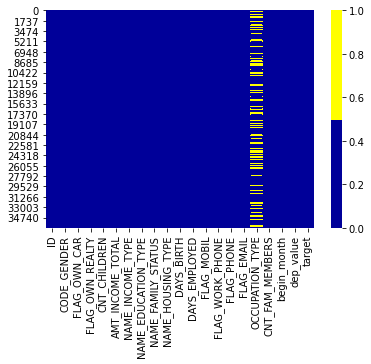

In [11]:
cols = new_data.columns[:30] # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(new_data[cols].isnull(), cmap=sns.color_palette(colours))

In [12]:
def dummyEncode(df):
    columnsToEncode = list(df.select_dtypes(include=['category','object']))
    le = LabelEncoder()
    for feature in columnsToEncode:
        try:
            df[feature] = le.fit_transform(df[feature])
        except:
            print('Error encoding '+feature)
    return df

In [13]:
new_data.drop('OCCUPATION_TYPE', axis=1, inplace=True)
new_data.drop('FLAG_MOBIL', axis=1, inplace=True)
data = dummyEncode(new_data)
data.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,begin_month,dep_value,target
0,5008804,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,-15.0,0,0
1,5008805,1,1,1,0,427500.0,4,1,0,4,-12005,-4542,1,0,0,2.0,-14.0,0,0
2,5008806,1,1,1,0,112500.0,4,4,1,1,-21474,-1134,0,0,0,2.0,-29.0,0,0
3,5008808,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,0,1,1,1.0,-4.0,0,0
4,5008809,0,0,1,0,270000.0,0,4,3,1,-19110,-3051,0,1,1,1.0,-26.0,0,0


<a id = "feature"></a>
# Feature Engineering

To dos:
1. Define a test and train sets
2. create a 'approval set' DONE
3. Find correlations to approval
4. Train based on approval to extraplate test

In [14]:
#med_train = train['LotFrontage'].median()
#print(med_train)
#train['LotFrontage'] = train['LotFrontage'].fillna(med_train)

#train['PrecFrontage'] = train['LotFrontage']/train['LotArea'] * 100

#med_test = test['LotFrontage'].median()
#print(med_test)
#test['LotFrontage'] = test['LotFrontage'].fillna(med_test)

#test['PrecFrontage'] = test['LotFrontage'] / test['LotArea'] * 100

#train.head()

<a id = "analysis"></a>
# Analysis

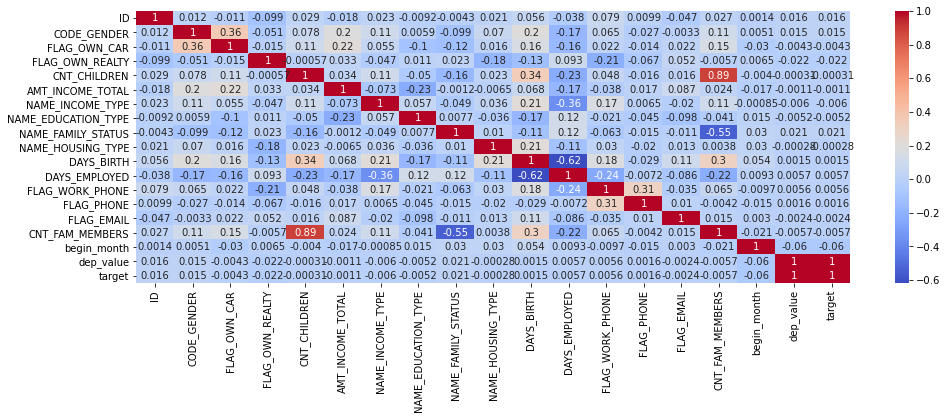

In [15]:
cols = data.columns[:50]
plt.figure(figsize = (16,5))
sns.heatmap(data[cols].corr(), annot = True, cmap= 'coolwarm', fmt='.2g')

<a id = "visual"></a>
# Visualizations

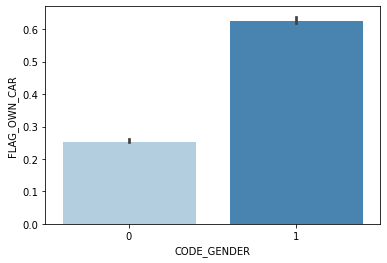

In [16]:
sns.barplot(x = 'CODE_GENDER', y = 'FLAG_OWN_CAR', data = data,
            palette = 'Blues', edgecolor = 'w')

plt.show()

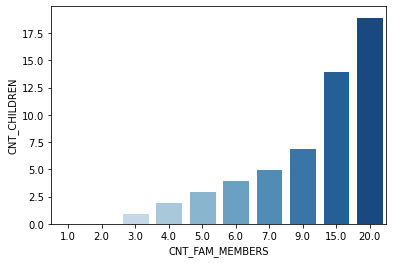

In [17]:
sns.barplot(x = 'CNT_FAM_MEMBERS', y = 'CNT_CHILDREN', data = data,
            palette = 'Blues', edgecolor = 'w')

<a id = "regress"></a>
# Regression

In [ ]:
dataset = pd.get_dummies(data, columns = ["CNT_CHILDREN", "CNT_FAM_MEMBERS", "NAME_FAMILY_STATUS"])
length = round(len(data)/2)
train = dataset[:length]
test = dataset[length:]

y=train['target']
X=train.drop('target', axis=1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 473, random_state = 2)


<a id = "random"></a>
## Random Forest

In [30]:
model_1 = RandomForestClassifier(n_estimators=100)
model_1.fit(X_train, y_train)

predict1 = model_1.predict(X_val)
acuracy1 = accuracy_score(predict1, y_val)
print('Accuracy: ', acuracy1)

Accuracy:  1.0


<a id = "gradient"></a>
## Gradient

In [34]:
model_2 = GradientBoostingClassifier(n_estimators=200, max_depth=3, learning_rate=0.05)
model_2.fit(X_train, y_train)

predict2 = model_2.predict(X_val)
acuracy2 = accuracy_score(predict2, y_val)
print('Accuracy: ', acuracy2)

Accuracy:  1.0


<a id = "logic"></a>
## Logistic

In [29]:
model_3 = LogisticRegression(random_state=0)
model_3.fit(X_train, y_train)

predict3 = model_3.predict(X_val)
acuracy3 = accuracy_score(predict3, y_val)
print('Accuracy: ', acuracy3)

Accuracy:  0.9873150105708245


<a id = "decision"></a>
## Decision Tree

In [31]:
model_4 =  DecisionTreeClassifier()
model_4.fit(X_train, y_train)

predict4 = model_4.predict(X_val)
acuracy4 = accuracy_score(predict4, y_val)
print('Accuracy: ', acuracy4)

Accuracy:  1.0


<a id = "final"></a>
# Final Accuracies

In [35]:
df = pd.DataFrame({'Random Forest': acuracy1, 'Gradient':acuracy2, 'Logistic': acuracy3, ' Decision Tree': acuracy4} , index=[0])
df.rename(index={0:'Accuracy'}, inplace=True)
df

,Random Forest,Gradient,Logistic,Decision Tree
Accuracy,1.0,1.0,0.987315,1.0
